#  Úvod do strojového učení  
##  Základní pojmy


+  **Strojové učení** (*Machine Learning*)
   
   Pojem *strojové učení* označuje algoritmy a modely, které umožňují počítači se samostatně učit. To typicky znamená,   
   odvodit si nějaké závislosti z předložených dat nebo zdokonalovat své chování na základě interakce s okolím.
   V oblasti datové analýzy chápeme strojové učení zejména jako nástroj na vytváření modelů (z) dat.

   Pozn.: Český překlad *strojové učení* není přesný, jedná o učení strojů, nikoli o strojové (automatizované) učení.
   
   
+ **Základní typy algoritmů strojového učení** 

  + **Učení s učitelem** (*Supervised learning*)
  + **Učení bez učitele** (*Unsupervised learning*)
  + **Zpětnovazebné učení** (*Reinforcement learning*) [zpětnovazebné učení je nad rámec tohoto kurzu]
   
  
+  **Učení s učitelem** 

  Učení se jmenuje s učitelem proto, že učící algoritmus dostane vždy k dispozici data **včetně požadovaných (správných)
  výstupů**. Cílem je modelovat vztah mezi vstupy (vektorem příznaků, features) a výstupy. Naučený model pak umožňuje
  pro nový vektor příznaků predikovat hodnotu výstupu.  
  Datům, která se používají pro učení, se říká **tréninková množina**. 
  
  Základní dvě úlohy, které spadají pod učení se učitelem, jsou **klasifikace** a **regrese**. 
  
  1. **Klasifikace**  
    V klasifikačních úlohách představuje výstup modelu (label) indikátor třídy.
 
  2. **Regrese**
    V regresních úlohách je na výstupu modelu spojitá hodnota. 
    

## Příklad klasifikace


Ukažme si klasifikaci na známé a jednoduché datové množině Iris. Jedná se o klasifikaci květů kostatců, 
datová množina obsahuje tři třídy Setosa, Versicolor a Virginica. 

![kosatce ukazka](./static/kosatce.jpeg)

Data obsahují 150 vzorků, každý vzorek se sestává ze 4 příznaků a labelu (jedné ze tří tříd).
![kosatce data](./static/iris_data.png)

**Cílem** klasifikační úlohy je modelovat vztah mezi příznaky 
(délky a šířky kališního lístku a délky a šířky okvětního lístku) a třídou (versicolor, setosa, virginica). Jinými slovy, vytvořit model -- klasifikátor, který nám pro dané hodnoty kalištních a okvětních lístků vrátí správné zařazení daného vzorku do třídy.

(Pozn. následující ukázka předpokládá nainstalované scikit-learn.)

1. Načteme data, vypíšeme si jejich dimenze (shape, t. j. počty vzorů, počty příznaků, atd.) a vypíšeme si první vzorek.

In [1]:
from  sklearn import  datasets

iris = datasets.load_iris()   # načteme si data, Iris data jsou "vestavěná"
x = iris.data                 # příznaky 
y = iris.target               # třídy (labely)     

print("Příznaky: ", x.shape)
print("Třídy: ", y.shape)

print("První vzor: ", x[0], y[0])

Příznaky:  (150, 4)
Třídy:  (150,)
První vzor:  [5.1 3.5 1.4 0.2] 0


2. Rozdělíme si data na trénovací a testovací, testovací množina bude tvořena 20% z dat. Opět si pro jistotu vypíšeme dimenze získaných matic a vektorů.

**Trénovací množina** je část dat, kterou používáme během trénování modelu (během fáze učení).

**Testovací množina** používá se k ověření, zda výsledný model funguje. Je to hrubý test schopnosti modelu generalizovat, tedy dávat rozumné odpovědi na vstupy, které nebyly viděny během učící fáze. 

In [2]:
# Rozdělme si data na trénovací a testovací 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

print("Příznaky trénovací: ", x_train.shape)
print("Třídy trénovací: ", y_train.shape)
print("Příznaky testovací: ", x_test.shape)
print("Třídy testovací: ", y_test.shape)

Příznaky trénovací:  (120, 4)
Třídy trénovací:  (120,)
Příznaky testovací:  (30, 4)
Třídy testovací:  (30,)


3. Nyní potřebujeme nějaký klasifikátor. Zvolme pro začátek rozhodovací strom. Zatím je to pro nás černá skříňka, která má nějaké vstupy a na výstupy a dokáže se učit. 

In [3]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()

4. Natrénujeme na trénovací množině.

In [4]:
classifier.fit(x_train,y_train);          # natrénovánání na data (x_train, y_train)

5. Ohodnotíme pomocí naučeného modelu testovací data.

In [5]:
predictions = classifier.predict(x_test)

6. Vypíšeme si jednotlivé testovací vzory, jejich predikovanou a skutečnou třídu a zda si tyto třídy odpovídají.

In [6]:
print("Příznaky:            Predikovaná třída:  Skutečná třída:")
print("--------------------------------------------------------")
for features, predicted_label, true_label in zip(x_test, predictions, y_test):
    print(features, "   ", predicted_label, "                 ", true_label, 
          "                ", "OK" if predicted_label == true_label else ":(") 

Příznaky:            Predikovaná třída:  Skutečná třída:
--------------------------------------------------------
[5.1 3.3 1.7 0.5]     0                   0                  OK
[6.3 3.3 6.  2.5]     2                   2                  OK
[6.1 3.  4.9 1.8]     2                   2                  OK
[5.1 2.5 3.  1.1]     1                   1                  OK
[4.8 3.4 1.9 0.2]     0                   0                  OK
[7.7 2.8 6.7 2. ]     2                   2                  OK
[5.7 3.  4.2 1.2]     1                   1                  OK
[7.7 3.8 6.7 2.2]     2                   2                  OK
[6.7 3.  5.  1.7]     2                   1                  :(
[6.9 3.2 5.7 2.3]     2                   2                  OK
[5.8 2.6 4.  1.2]     1                   1                  OK
[6.3 2.8 5.1 1.5]     1                   2                  :(
[4.4 3.  1.3 0.2]     0                   0                  OK
[5.  3.6 1.4 0.2]     0                   0           

## Příklad regrese

Pro ukázku regrese použijeme jednoduchou datovou množinu Diabetes. Vzorky mají 10 příznaků a jeden výstup. My použijeme k regresi pouze jeden příznak, 3. příznak, což je BMI. Predikuje se míra progrese nemoci, která je daná číslem  
25 - 346.

In [7]:
# Načteme data dat a vezmeme jen třetí (index 2) příznak.
from sklearn import datasets 

diabetes = datasets.load_diabetes()

x = diabetes.data[:, 2].reshape(-1, 1) # změníme shape (442, ) na (442, 1)
y = diabetes.target

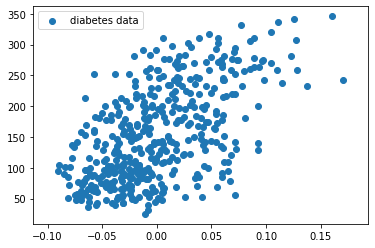

In [13]:
# Data si zobrazíme. 
import matplotlib.pyplot as plt 

plt.scatter(x, y, label="diabetes data")
plt.legend();

 Stejně jako u klasifikace, oddělme část dat na testování. V tomto případě posledních 20 vzorků.

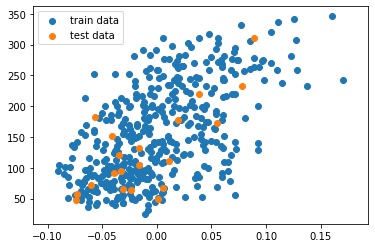

In [9]:
# rozdělme data na trénovací a testovací
x_train, x_test = x[:-20], x[-20:]
y_train, y_test = y[:-20], y[-20:]

plt.scatter(x_train, y_train, label="train data")
plt.scatter(x_test, y_test, label="test data")
plt.legend();

Musím zvolit model, vezmeme nejjednodušší lineární regresi a natrénujeme na trénovací množině.

In [10]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x_train, y_train);

Ohodnotíme data z testovací množiny a zobrazíme si skutečné testovací vzorky a predikované hodnoty.

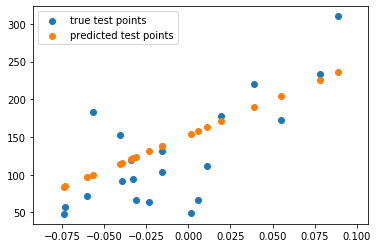

In [11]:
predictions = model.predict(x_test)

plt.scatter(x_test, y_test, label="true test points")
plt.scatter(x_test, predictions, label="predicted test points")
plt.legend();

Ještě spočteme predikci pro všechna data a zobrazíme.

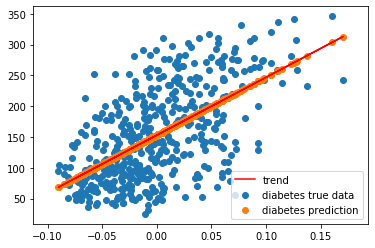

In [12]:
predictions = model.predict(x)
plt.scatter(x, y, label="diabetes true data")
plt.scatter(x, predictions, label="diabetes prediction")
plt.plot(x, predictions, color="red", label="trend")
plt.legend();

<hr>


Obrázky Iris převzaté z https://medium.com/@jebaseelanravi96/machine-learning-iris-classification-33aa18a4a983 .